<a href="https://colab.research.google.com/github/DianaElena99/DataScience-Crashcourse/blob/main/DeepLearningProj_MammographicMasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict whether a mammogram mass is benign or malignant

Data set used for this project: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

   Missing Attribute Values: Yes
    - BI-RADS assessment:    2
    - Age:                   5
    - Shape:                31
    - Margin:               48
    - Density:              76
    - Severity:              0

  Class Distribution: benign: 516; malignant: 445

## 1. Data Preprocessing

Import the necessary libraries/packages

In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

Import the data set using pandas

In [12]:
_dataset = pd.read_csv("mammographic_masses.data")
_dataset.size
_dataset.head()

,BI-Rads,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Deal with the missing values. For the age column, replace NaN with the mean value. For the other columns, since they are categorical data, use the mode(most frequent value)

In [13]:
_imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True )
_age_col = np.array(_dataset['Age']).reshape(-1,1)
_imputer_mean.fit(_age_col)
_age_preproc = _imputer_mean.transform(_age_col)

_dataset['Age'] = _age_preproc
_dataset.head()


,BI-Rads,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [14]:
_imputer_mode = SimpleImputer(missing_values = np.nan , strategy="most_frequent", add_indicator=True)

_shape_col = np.array(_dataset['Shape']).reshape(-1,1)
_imputer_mode.fit(_shape_col)
_shape_preproc = _imputer_mode.transform(_shape_col)
_dataset['Shape'] = _shape_preproc

_margin_col = np.array(_dataset['Margin']).reshape(-1,1)
_imputer_mode.fit(_margin_col)
_margin_preproc = _imputer_mode.transform(_margin_col)
_dataset['Margin'] = _margin_preproc

_density_col = np.array(_dataset['Density']).reshape(-1,1)
_imputer_mode.fit(_density_col)
_density_preproc = _imputer_mode.transform(_density_col)
_dataset['Density'] = _density_preproc

_dataset.head()

,BI-Rads,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,3.0,1


# Split the dataset into train and test

In [42]:
X = _dataset.iloc[: , 1:-1]
Y = _dataset.iloc[:,-1]
_scaler = preprocessing.StandardScaler()
_scaler.fit_transform(_dataset[['Age', 'Shape', 'Density', 'Margin']])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Multi-Layer Perceptron

In [43]:
from tensorflow import keras 
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

_model = Sequential()
_model.add(Dense(units=6, input_dim=4, activation='relu' ,kernel_initializer='normal' ))
_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 30        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [44]:
_history = _model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6849
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.7409
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5716
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.7500
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.7747
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7682
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7747
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7721
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7839
Epoch 11/

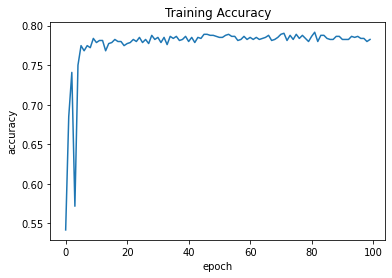

In [45]:
import matplotlib.pyplot as plt
plt.plot(_history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

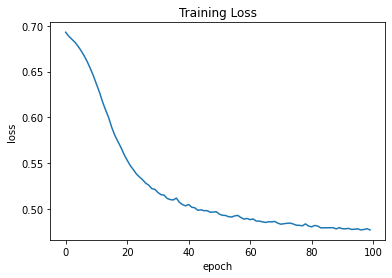

In [46]:
import matplotlib.pyplot as plt
plt.plot(_history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Evaluate the model

In [41]:
_test_loss, _test_acc = _model.evaluate(X_test, Y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7927
